

# Project: Investigate the Medical Appointment No Show Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

###### This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ indicated the day on which the patient set up their appointment.  
● ‘Neighborhood’ indicates the location of the hospital.  
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  
● ‘No_show’ indicates ‘No’ if the patient showed up to their appointment, ‘Yes’ if they did not show up.  

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('KaggleV2-May-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [3]:
# Show first 5 rows of dataframe

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Show last 5 rows of dataframe

df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# Display the dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**There are columns with inappropriate data types**

In [6]:
# Show summary statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Check if columns contain null values

df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**The data frame columns do not contain any null values**

In [8]:
# Check for duplicate rows

df.duplicated().sum()

0

**The dataframe does not contain any duplicated rows**

In [9]:
# Check for the number of records with unrealistic age values

df[df['Age'] <= 0].Age.value_counts()

 0    3539
-1       1
Name: Age, dtype: int64

In [10]:
print(f'Total number of age values 0 and below: {df[df["Age"] <= 0].Age.count()}')

Total number of age values 0 and below: 3540


#### Summary of Issues

- PatientID should be string data type
- AppointmentID should be string data type
- Gender should be category data type
- ScheduledDay, AppointmentDay should be datetime data type
- Age has incorrect data (age <= 0 is incorrec)
- Hypertension column name misspelled
- No-show column values inconsistent with other column values
- No-show column name should use an underscore instead of hyphen

### Data Cleaning

In [11]:
# Rename the hipertension, handcap and no-show column names

df.rename(columns={'Hipertension':'Hypertension', 'No-show':'No_show', 'Handcap':'Handicap'}, inplace=True)

In [12]:
# Change column data types

new_types = {'PatientId':'str', 'AppointmentID':'str', 'Gender':'category'}

df = df.astype(new_types)

In [13]:
# Change date columns to datetime datatype

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
# Replace age values <= 0 with the mean age of dataset

mean_age = int(df.Age.mean())
df.replace({'Age' : {0: mean_age, -1: mean_age }}, inplace=True)

In [15]:
# Replace No_show column values with 0 and 1

df.replace({'No_show': {'No': 0, 'Yes': 1}}, inplace=True)

In [16]:
# Change No_show column data type to int

df = df.astype({'No_show': 'int64'})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: category(1), datetime64[ns](2), int64(8), object(3)
memory usage: 11.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Q1. Were those that received SMS notifications more likely (than those who didnt) to show up?

In [18]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

>75045 patients did not receive an SMS reminder while 35482 patients received an SMS reminder to show up for their appointment

In [19]:
df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
0             0          62510
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64

>62510 of those that didnt receive an SMS reminder showed up while 12535 did not show up
25698 of those that received an SMS reminder showed up whereas 9784 did not show up. 

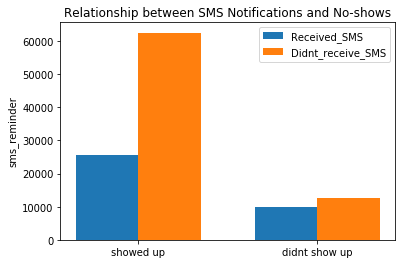

In [20]:
received_list = df.groupby('SMS_received')['No_show'].value_counts()[1]
didnt_receive_list = df.groupby('SMS_received')['No_show'].value_counts()[0]
labels = ['showed up','didnt show up']
x = np.arange(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(x - 0.35/2, received_list, 0.35, label='Received_SMS')
bar2 = ax.bar(x + 0.35/2, didnt_receive_list, 0.35, label='Didnt_receive_SMS')
ax.set_ylabel('sms_reminder')
ax.set_title('Relationship between SMS Notifications and No-shows')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

>Among both those that showed up for their appointment and those that did not, a greater number did not recieve an SMS reminder. This difference is more pronounced among those that showed up

In [21]:
sms_means = df.groupby('SMS_received')['No_show'].mean()
sms_means

SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64

In [22]:
sms_means[1]-sms_means[0]

0.10871233493111582

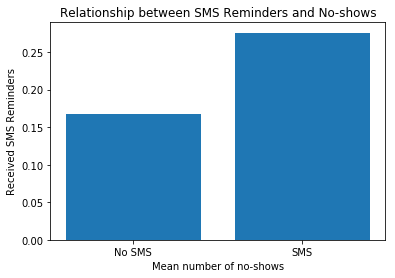

In [23]:
plt.bar(x=[1,2], height=sms_means, tick_label = ['No SMS','SMS']);
plt.ylabel('Received SMS Reminders')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between SMS Reminders and No-shows')
plt.legend()

>There were 11% more no-shows among people that received an SMS reminder than among those that didnt receive an SMS reminder

### Which factors are of importance in predicting no-shows?

In [24]:
# Overall proportion of no shows in the dataset

df.No_show.mean()

0.20193255946510807

> Approximately 20% of all patients did not show up for their scheduled appointment

#### Gender

In [25]:
gender_means = df.groupby('Gender')['No_show'].mean()
gender_means

Gender
F    0.203146
M    0.199679
Name: No_show, dtype: float64

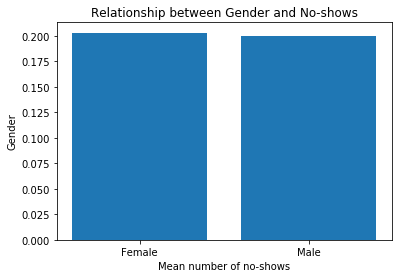

In [26]:
plt.bar(x=[1,2], height=gender_means, tick_label = ['Female','Male']);
plt.ylabel('Gender')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between Gender and No-shows')
plt.legend()

> There is no discernible relationship between gender and no shows in the dataset

#### Age

In [27]:
age_means = df.groupby('No_show')['Age'].mean()
age_means

No_show
0    39.006938
1    35.376988
Name: Age, dtype: float64

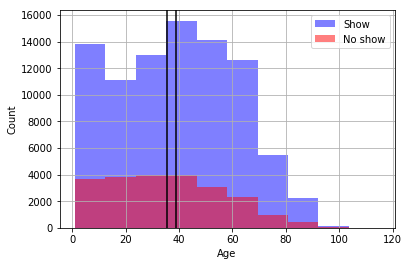

In [28]:
df[df['No_show'] == 0].Age.hist(bins=10, alpha=0.5, color='blue', label='Show');
df[df['No_show'] == 1].Age.hist(bins=10, alpha=0.5, color='red', label='No show');
plt.axvline(age_means[0], color='black')
plt.axvline(age_means[1], color='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

> The average age of those that show up for their appointment was 39 while the average age of those that did not show up for their appointment was 35. There is no other discernible difference in trends of age between the show and no show groups. 

#### Scholarship

In [29]:
schol_means = df.groupby('Scholarship')['No_show'].mean()
schol_means

Scholarship
0    0.198072
1    0.237363
Name: No_show, dtype: float64

In [30]:
schol_means[1]-schol_means[0]

0.039291483070073158

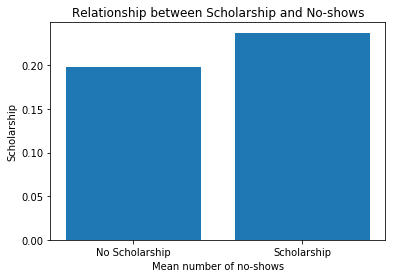

In [31]:
plt.bar(x=[1,2], height=schol_means, tick_label = ['No Scholarship','Scholarship']);
plt.ylabel('Scholarship')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between Scholarship and No-shows')
plt.legend()

> There are 4% more no-shows among those that participate in the scholarship program than among those that do not participate in this program

#### Hypertension

In [32]:
htn_means = df.groupby('Hypertension')['No_show'].mean()
htn_means

Hypertension
0    0.209037
1    0.173020
Name: No_show, dtype: float64

In [33]:
htn_means[1]-htn_means[0]

-0.036017223696730022

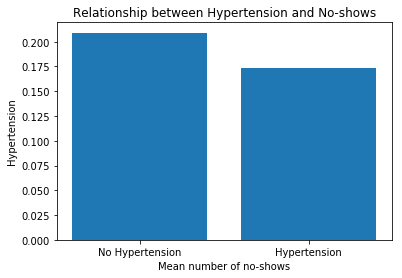

In [34]:
plt.bar(x=[1,2], height=htn_means, tick_label = ['No Hypertension','Hypertension']);
plt.ylabel('Hypertension')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between Hypertension and No-shows')
plt.legend()

> There are 4% fewer no shows among those with hypertension than among those that do not have hypertension

#### Diabetes

In [35]:
diabetes_means = df.groupby('Diabetes')['No_show'].mean()
diabetes_means

Diabetes
0    0.203628
1    0.180033
Name: No_show, dtype: float64

In [36]:
diabetes_means[1]-diabetes_means[0]

-0.023595512896030096

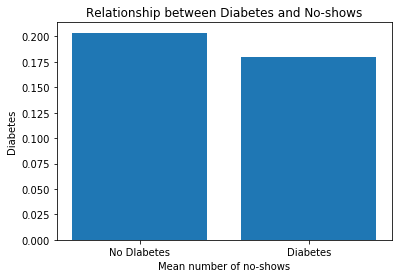

In [37]:
plt.bar(x=[1,2], height=diabetes_means, tick_label = ['No DIabetes','Diabetes']);
plt.ylabel('Diabetes')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between Diabetes and No-shows')
plt.legend()

> There are 2% fewer no shows among diabetic patients than among non-diabetic patients

#### Alcoholism

In [38]:
alcohol_means = df.groupby('Alcoholism')['No_show'].mean()
alcohol_means

Alcoholism
0    0.201946
1    0.201488
Name: No_show, dtype: float64

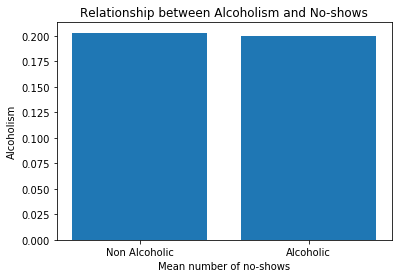

In [39]:
plt.bar(x=[1,2], height=gender_means, tick_label = ['Non Alcoholic','Alcoholic']);
plt.ylabel('Alcoholism')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between Alcoholism and No-shows')
plt.legend()

> There is no discernible difference in no show numbers between alcoholics and non-alcoholics

#### Handicap

In [40]:
handicap_means = df.groupby('Handicap')['No_show'].mean()
handicap_means

Handicap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: No_show, dtype: float64

In [41]:
handicap_means.sort_values()

Handicap
1    0.179236
2    0.202186
0    0.202353
3    0.230769
4    0.333333
Name: No_show, dtype: float64

In [42]:
handicap_means[4]-handicap_means[1]

0.15409729023832841

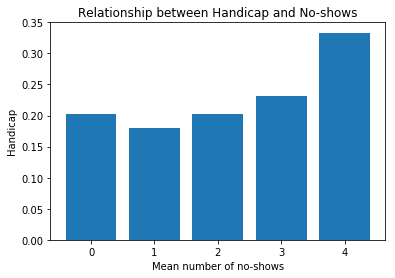

In [43]:
plt.bar(x=[1,2,3,4,5], height=handicap_means, tick_label = [0,1,2,3,4]);
plt.ylabel('Handicap')
plt.xlabel('Mean number of no-shows')
plt.title('Relationship between Handicap and No-shows')
plt.legend()

> The proportion of no shows is 15% higher among those with a handicap level of 4 than among the handicap level with the lowest no show proportion (level 1)

<a id='conclusions'></a>
## Conclusions

1. Approximately 20% of all patients did not show up for their appointment.
2. Patients that received SMS reminders had a higher proportion of no shows than those that did not receive an SMS reminder.
3. Scholarship, Hypertension, Diabetes and Handicap have discernible differences in the proportion of no shows, with handicap having the highest difference in proportions. 
4. Handicap has the highest correlation with no shows.

### Limitations
1. Illogical data necessitated replacement (ages 0 and below replaced with mean age of patients)


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0